In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [18]:
d1 = json.load(open('train_01.json'))
d2 = json.load(open('train_02.json'))

In [22]:
d = []
r = {'inside':1, 'outside':-1}
for k in dataset.keys():
    _df = pd.DataFrame(d1[k], columns=['A', 'B'])
    _df['class'] = r[k]
    d.append(_df)
df1 = pd.concat(d, axis=0, ignore_index=True)

In [23]:
d = []
r = {'inside':1, 'outside':-1}
for k in dataset.keys():
    _df = pd.DataFrame(d2[k], columns=['A', 'B'])
    _df['class'] = r[k]
    d.append(_df)
df2 = pd.concat(d, axis=0, ignore_index=True)

In [24]:
df1

,A,B,class
0,0.729520,0.728634,1
1,0.826506,0.940316,1
2,0.602314,0.489100,1
3,0.792430,0.972460,1
4,0.373906,0.380795,1
5,0.521383,0.701165,1
6,0.579949,0.860210,1
7,0.447271,0.232087,1
8,0.826693,0.970862,1
9,0.209609,0.079489,1


In [43]:
def plot(df):
    plt.figure(figsize=(7,7))
    font = {'weight' : 'bold', 'size'   : 20}
    plt.rc('font', **font)
    try:
        df1, df2 = [x for _, x in df.groupby(df['class'] == 1)]
        plt.scatter(df1.A, df1.B)
        plt.scatter(df2.A, df2.B)
    except Exception:
        print('Only one class was detected')
        plt.scatter(df.A, df.B)
    plt.xlabel('A')
    plt.ylabel('B')

In [45]:
train1, test1 = train_test_split(df1, test_size=0.2)
train2, test2 = train_test_split(df2, test_size=0.2)

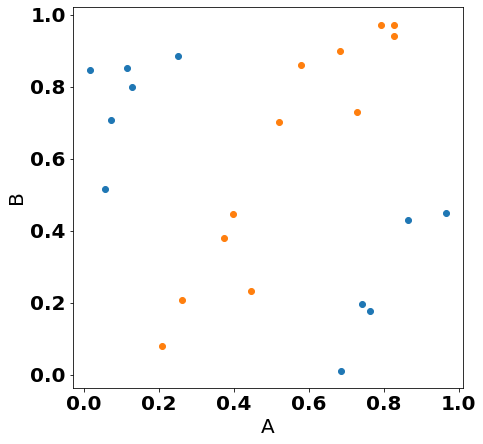

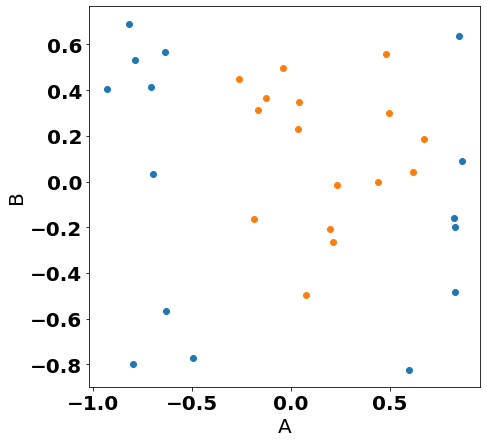

In [81]:
plot(train1)
plot(train2)

# so we need to use ellipses

In [85]:
class Classifier:
    def __init__(self, train):
        self.df = train
        self.X = self.df[['A', 'B']]
        self.X['A2'] = self.X.A*self.X.A
        self.X['B2'] = self.X.B*self.X.B
        self.X['AB'] = self.X.A*self.X.B
        self.X['C'] = 1
        self.y = train['class']
        self.w = np.zeros(6)
    
    def fix(self, X, y):
        self.w += y*X/np.linalg.norm(X)
        
    def check(self):
        res = self.y * np.sum(self.w * self.X, axis=1)
        bad = self.X[res <= 0]
        try:
            return False, bad.index[0]
        except Exception:
            return True, 0
    
    def classify(self):
        flag, idx = self.check()
        while not flag:
            self.fix(self.X.loc[idx,:], self.y[idx])
            flag, idx = self.check()
        print(self.w)
        
#     def test(self, df):
#         test = df[['A', 'B']]
#         test['C'] = 1
#         test['class_detected'] = (np.sum(self.w * test[['A', 'B', 'C']], axis=1) > 0).astype(int)
#         return test
    
    def plot(self, df):
        plot(df)
        xmax, xmin = np.max(df.A), np.min(df.A)
        ymax, ymin = np.max(df.B), np.min(df.B)
        x = np.linspace(xmin,xmax,100)
        y = np.linspace(ymin,ymax,100)
        X, Y = np.meshgrid(x,y)
        ones = np.ones((100,100))
        Z = np.zeros((100,100))
        for i, m in enumerate([X,Y,X*X,Y*Y, X*Y, ones]):
            Z+=C.w[i]*m
        plt.contour(X, Y, Z, [0])


In [86]:
C = Classifier(train1)

In [87]:
C.classify()

A     0.411135
B    -2.945600
A2   -3.253817
B2    0.175521
AB    4.390585
C     1.224269
Name: 9, dtype: float64


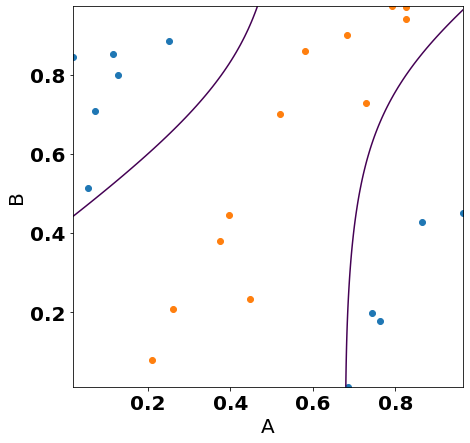

In [88]:
C.plot(train1)